# Coffee Shop Exploration with Python

### Introduction 
<br> 
Caffeine Form is a company creating coffee cups from recycled material, sells the cups to coffee shops through their website 
<br>
but, would prefer to partner directly with the shops. This project would aim to answer two business questions
<br>
<br>
-  What types of shop that get the most reviews?
<br>
<br>
-  Relationship between types of shop and number of reviews.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the file in using .csv
coffee = pd.read_csv('coffee.csv')

In [3]:
# print the first 2 rows
coffee.head(2)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True


In [4]:
# show data statistics
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


This dataset contains 9 columns, 200 rows. columns like Rating, reviews, Dine in option and Take out option have missing values. 

### Dataset Description
<br>
Region - Nominal. Where the store is located. One of 10 possible regions (A to J).Missing values should be replaced with “Unknown”.
<br>
Place name - Nominal. The name of the store. Missing values should be replaced with “Unknown”.
<br>
Place type -  Nominal. The type of coffee shop. One of “Coffee shop”, “Cafe”, “Espresso bar”, and “Others”. Missing values should be replaced with “Unknown”.
<br>
Rating  - Ordinal. Average rating of the store from reviews. On a 5 point scale. Missing values should be replaced with 0.
<br>
Reviews  - Continuous. The number of reviews given to the store. Missing values should be replaced with the overall median
number.
<br>
Price  - Ordinal. The price range of products in the store. One of “$”, “$$” or “$$$”. Missing values should be replaced with "Unknown”.
<br>
Delivery Option  - Nominal. If delivery is available. Either True or False. Missing values should be replaced with False.
<br>
Dine in Option  - Nominal. If dine in is available. Either True or False. Missing values should be replaced with False.
<br>
Takeaway Option -  Nominal. If take away is available. Either True or False. Missing values should be replaced with False.

### Data Validation
Tasks
<br>
1. For every column in the data:
<br>
a. State whether the values match the description given in the table above.
<br>
b. State the number of missing values in the column.
<br>
c. Describe what you did to make values match the description if they did not
match.
<br>
2. Create a visualization that shows which is the most common type of coffee store. Use
the visualization to:
<br>
a. State which category of the variable place type the most observations
<br>
b. Explain whether the observations are balanced across categories
<br>
3. Describe the distribution of all of the number of reviews. Your answer must include a
visualization that shows the distribution.
<br>
4. Describe the relationship between type of store and number of reviews. Your answer
must include a visualization to demonstrate the relationship.


In [5]:
# get the columns
coffee.columns

Index(['Region', 'Place name', 'Place type', 'Rating', 'Reviews', 'Price',
       'Delivery option', 'Dine in option', 'Takeout option'],
      dtype='object')

In [6]:
# Check for duplicates
coffee.duplicated().sum()

0

Coffee has no duplicated Data

In [7]:
# check for missing columns with missing data
coffee.isna().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price               0
Delivery option     0
Dine in option     60
Takeout option     56
dtype: int64

Rating and Reviews both have 2 rows with null values while Dine in option has 60 rows with missing values and Takeout Option has 56 rows with missing values.

In [8]:
# Replace the missing values in rating with 0
coffee.Rating = coffee.Rating.fillna(0)

In [9]:
# Check for missing rows in rating
coffee.Rating.isna().sum()

0

Missing rows in Rating has successfully been replaced with 0

In [10]:
# Replace rows with missing values in Reviews with the middle number
med = coffee.Reviews.median()
print(med)
coffee.Reviews = coffee.Reviews.fillna(med)

271.5


In [11]:
# # Check for missing rows in reviews
coffee.Reviews.isna().sum()

0

Missing rows in Review has successfully been replaced with the median

In [12]:
# Replace missing values in Dine in and Take out option with False
coffee['Dine in option'] = coffee['Dine in option'].fillna('False')
coffee['Takeout option'] = coffee['Takeout option'].fillna('False')

In [13]:
# Task one; confirming unique observations in each column
coff_unique = coffee.nunique(axis = 0)
print('number of unique observation  :',
      coff_unique)

number of unique observation  : Region              10
Place name         187
Place type           4
Rating              13
Reviews            164
Price                3
Delivery option      2
Dine in option       2
Takeout option       2
dtype: int64


In [14]:
# Count the values in both take out and dine in option
print(coffee['Dine in option'].value_counts())
print(coffee['Takeout option'].value_counts())

True     140
False     60
Name: Dine in option, dtype: int64
True     144
False     56
Name: Takeout option, dtype: int64


In [15]:
# print the unique regions
# variable to hold the count
cnt = 0
# list to hold the unique strings
visited = []
for i in range(0, len(coffee['Region'])):
    if coffee['Region'][i] not in visited:
        visited.append(coffee['Region'][i])
        cnt += 1
print('Number of unique values :',
     cnt)
print('Unique values :',
     visited)

Number of unique values : 10
Unique values : ['C', 'J', 'F', 'B', 'A', 'E', 'D', 'G', 'I', 'H']


We can confirm that there are 10 unique observations in Region column, ranging from A - J

In [16]:
# check the data type for all columns
result = coffee.dtypes
print(result)

Region              object
Place name          object
Place type          object
Rating             float64
Reviews            float64
Price               object
Delivery option       bool
Dine in option      object
Takeout option      object
dtype: object


In [17]:
# convert dine in and take out option data type to boolean
def boolean(coffee, column):
    coffee[column] = coffee[column].apply(lambda x: True if str(x).lower()== 'true' else False)
    return coffee

In [18]:
# apply function
coffee = boolean(coffee, 'Dine in option')
coffee = boolean(coffee, 'Takeout option')

In [19]:
print(coffee.dtypes)

Region              object
Place name          object
Place type          object
Rating             float64
Reviews            float64
Price               object
Delivery option       bool
Dine in option        bool
Takeout option        bool
dtype: object


The original Dataset contains **200** rows and **9** columns. According to the stipulated tasks, I verified values to see if they matched the description given and got the following results.<br> **Region** has **10** unique values ranging from **A - J**. <br> **Place Name** has **187** unique values. <br> **Place Type** has **4** unique values. <br> **Rating** has **13** unique values. <br> **Reviews** has **164** unique values. <br> **Price** has **3** unique values. <br> **Dine in and Takeout Option** both have **1** unique value as opposed to two unique values shown in the data description table. This required some tidying. <br> Lastly, **Delivery Option** has **2** unique values<br><br>
        *Missing Values*<br> The following columns had missing values and were replaced the appropraite values. <br> **Rating** - 2 missing values; filled with **0** <br> **Reviews** - 2 missing values; filled with the median value. <br> **Dine in option** - 60 missing values; filled with False. <br> **Takeout option** - 56 missing values; filled with False.<br><br>
        *Data Types* <br> **Dine in and Takeout option** did not correspond with the given data type and were converted to **Boolean** using Lambda

### Data Visualization
As stated, this project aims to answer 3 business questions to guide the **coffee** team in making a decision with regards to distribution of their products.<br>
1. Which Place Type has the highest Category?. <br>
2. What is the distribution of Reviews in the Market?. <br>
3. What is the relationship between Reviews and place Type?.

### Which Place Type has the highest Category?. <br>
There are 4 categories in Place types and their order in decreasing popularity are **Coffee Shop**, **Cafe**, **Others** and **Espresso Bar**. <br> This information suggests that the team should focus on distributing the cups to Coffee shops.

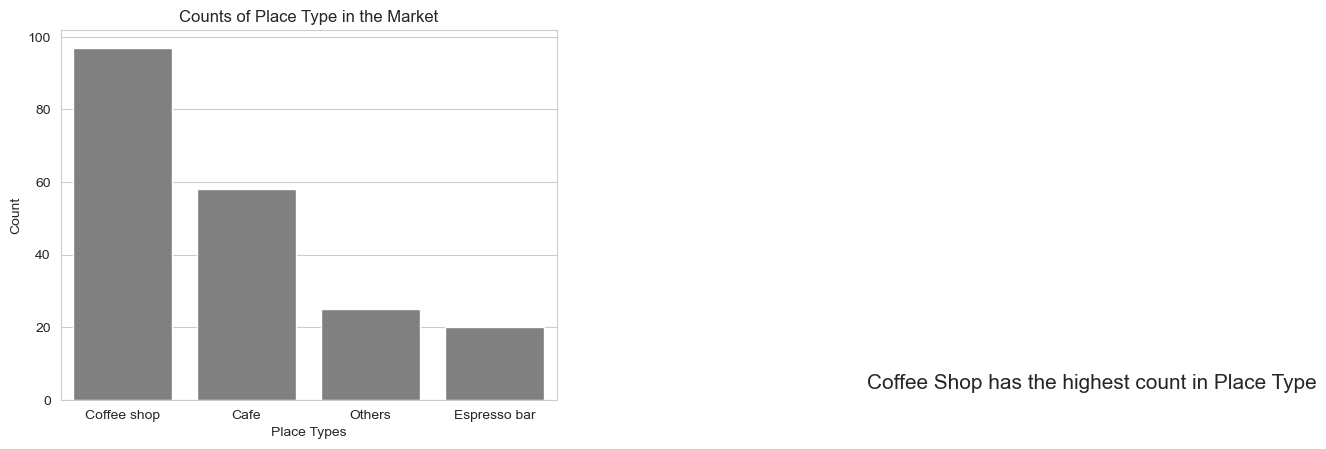

In [20]:
sns.set_style('whitegrid')
sns.countplot(x= 'Place type', data = coffee, color ='grey', order = coffee['Place type'].value_counts().index).set(title ='Counts of Place Type in the Market')
plt.text(x=6, y=3, s='Coffee Shop has the highest count in Place Type', fontsize = 15)
plt.xlabel('Place Types')
plt.ylabel('Count')
plt.show();

### How Does Review Differ in all Categories of Coffee Shops?
<br> The distribution of reviews showed the presence of outliers when visualized using a histogram. The outliers were removed after calculating the **IQR**, defining the upper and lower bounds and Identifying the indices of the outliers. <br> A total of 12 rows were lost and the new dataframe contained **188** rows. A new histogram suggested that some places have over 1000 reviews but majority have reviews below 1000. The team should work with places with less than 1000 reviews for a start.

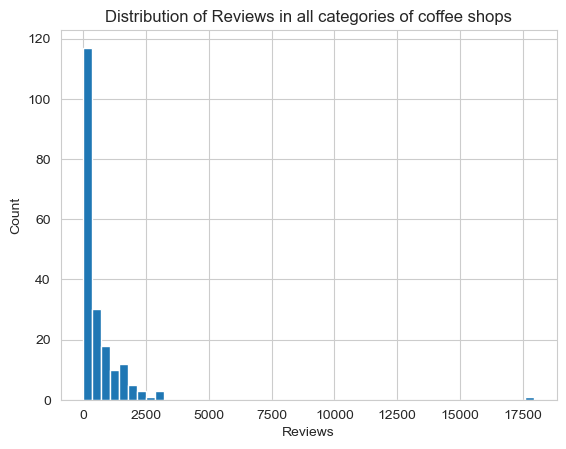

In [21]:
coffee['Reviews'].hist(bins=50)
plt.title('Distribution of Reviews in all categories of coffee shops')
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.show();

The distribution above suggests the presence of outliers in the reviews column. Using describe, we see that indeed there are outliers present in reviews

In [22]:
coffee.describe()['Reviews']

count      200.000000
mean       618.985000
std       1394.280842
min          3.000000
25%         48.500000
50%        271.500000
75%        780.750000
max      17937.000000
Name: Reviews, dtype: float64

Comparing the max value and q3 confirms the presence of outliers. Also the std value suggests thesame. Next, we use np.percentiles to detect the outliers and remove them from reviews column

In [23]:
def drop_outliers(coffee, Reviews, factor = 1.5):
    # using IQR drop outliers in Reviews
    # Calculate q1 and q3
    q1, q3 = np.percentile(coffee[Reviews], [25, 75])
    
    # calculate iqr
    iqr = q3 - q1
    
    # define upper and lower bounds for outliers
    upper_bound = q3 + (iqr * factor)
    lower_bound = q1 - (iqr * factor)
    
    # identify indicies of the outliers based on bounds
    outliers = coffee.index[(coffee[Reviews] < lower_bound) | (coffee[Reviews] > upper_bound)]
    
    #drop the outliers 
    coffee_cleaned = coffee.drop(outliers)
    return coffee_cleaned

In [24]:
# use the function for coffee
coffee_clean = drop_outliers(coffee, 'Reviews')
print('New shape :', coffee_clean.shape)

New shape : (188, 9)


12 rows was removed from coffee. Next, we plot a histogram of reviews using the new dataframe

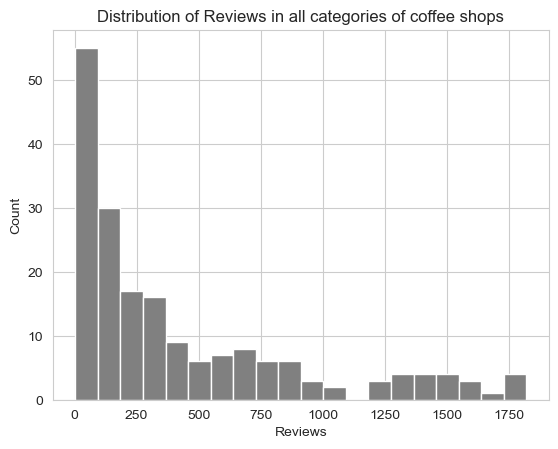

In [25]:
plt.hist(x = 'Reviews', data = coffee_clean, bins = 20, color = 'gray')
plt.title('Distribution of Reviews in all categories of coffee shops')
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.show();

### What is the Relationship between Place Type and Number of Reviews?
<br> Looking at the relationship between reviews and place type, **Cafes** have reviews as high as **1750** while the popular **Coffee Shops** have as high as **1250** reviews. Another place type worthy of note is **Espresso Bars** with reviews as high as **1500**. This decline with Coffee shops could be due to their spread.

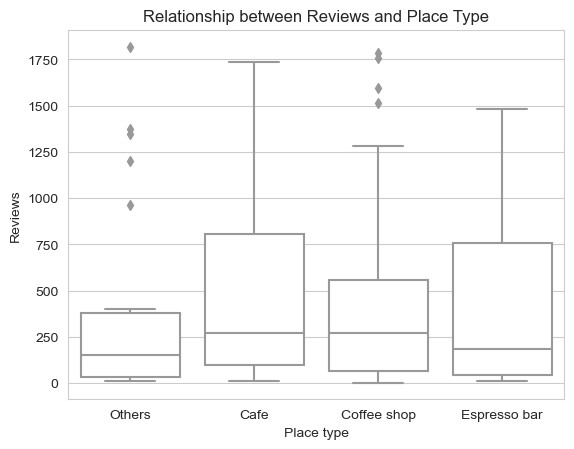

In [26]:
sns.boxplot(x= 'Place type', y = 'Reviews', data = coffee_clean, color = 'white').set(title = 'Relationship between Reviews and Place Type')
plt.xlabel=('Place Type')
plt.ylabel = ('Reviews')
plt.show();

#### Conclusion
<br> For a start, Cups should be distribited to **Coffee Shops and Cafes** with reviews between **450 and 1000**. Further analysis is required for the relationship between reviews and region.